# Часть 1. Проверка гипотезы в Python и составление аналитической записки

## Проверка гипотезы о лояльности пользователей сервиса Яндекс Книги из Санкт-Петербурга и Москвы

## Содержимое проекта
- Загрузка данных и знакомство с ними
- Проверка гипотезы в Python
- Аналитическая записка

## 1. Загрузка данных и знакомство с ними

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df = pd.read_csv('/datasets/yandex_knigi_data.csv')
df = df.set_index('Unnamed: 0')
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 8783
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   city    8784 non-null   object 
 1   puid    8784 non-null   int64  
 2   hours   8784 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 274.5+ KB
None
              city    puid       hours
Unnamed: 0                            
0           Москва    9668   26.167776
1           Москва   16598   82.111217
2           Москва   80401    4.656906
3           Москва  140205    1.840556
4           Москва  248755  151.326434


In [3]:
df = df.drop_duplicates(subset='puid', keep=False)
num_duplicates = df['puid'].duplicated().sum()
print(f"Найдено дубликатов по id: {num_duplicates}")

Найдено дубликатов по id: 0


Количество пользователей в каждой группе:
Москва             5990
Санкт-Петербург    2306
Name: city, dtype: int64


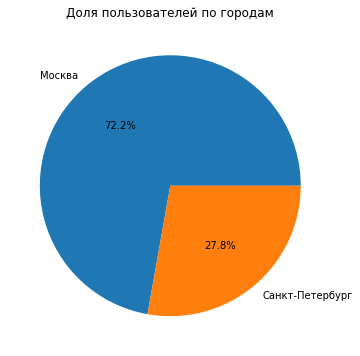

In [4]:
city_counts = df['city'].value_counts()
print("Количество пользователей в каждой группе:")
print(city_counts)

city_counts.plot.pie(autopct='%1.1f%%', figsize=(6, 6), title='Доля пользователей по городам')
plt.ylabel('')
plt.show()

In [5]:
moscow = df[df['city'] == 'Москва']
spb = df[df['city'] == 'Санкт-Петербург']
print("Москва:")
print(moscow['hours'].describe())

print("\nСанкт-Петербург:")
print(spb['hours'].describe())

Москва:
count    5990.000000
mean       10.848192
std        36.925622
min         0.000022
25%         0.057042
50%         0.888232
75%         5.933439
max       857.209373
Name: hours, dtype: float64

Санкт-Петербург:
count    2306.000000
mean       11.264433
std        39.831755
min         0.000025
25%         0.060173
50%         0.875355
75%         6.138424
max       978.764775
Name: hours, dtype: float64


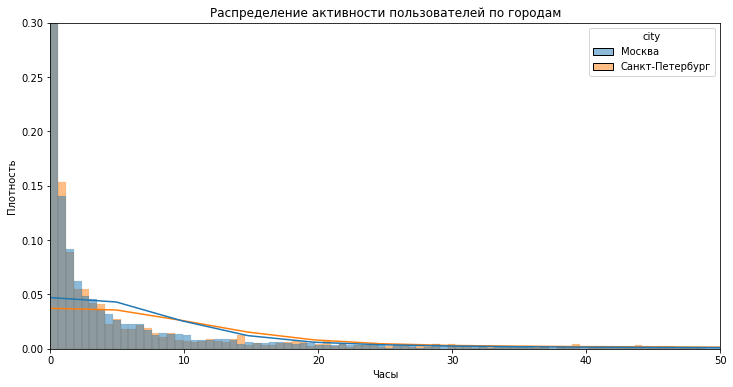

In [6]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='hours', hue='city', stat='density', kde=True, common_norm=False)
plt.title('Распределение активности пользователей по городам')
plt.xlabel('Часы')
plt.ylabel('Плотность')
plt.xlim(0, 50)
plt.ylim(0, 0.3)
plt.show()

## 2. Проверка гипотезы в Python

- Нулевая гипотеза H₀: Средняя активность пользователей в часах в двух группах (Москва и Санкт-Петербург) не различается.

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.

In [7]:
metric_a = df[df['city']=='Москва']['hours']
metric_b = df[df['city']=='Санкт-Петербург']['hours'] 
alpha = 0.05
stat_ttest, p_value_ttest = ttest_ind(
    metric_a, 
    metric_b, 
    alternative='less'
)
if p_value_ttest>alpha:
    print(f'p-value теста Стьюдента = {round(p_value_ttest, 2)}')
    print('Нулевая гипотеза находит подтверждение! Средняя активность пользователей в часах в двух группах не различается.')
else:
    print(f'p-value теста Стьюдента = {round(p_value_ttest, 2)}')
    print('Нулевая гипотеза не находит подтверждения! Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.')

p-value теста Стьюдента = 0.33
Нулевая гипотеза находит подтверждение! Средняя активность пользователей в часах в двух группах не различается.


## 3. Аналитическая записка

Цель анализа: Проверить, существует ли статистически значимое различие в средней активности пользователей (в часах) между городами Москва и Санкт-Петербург.

Метрика: количество часов активности пользователя (hours)

Группы: пользователи из Москвы и Санкт-Петербурга

Тип теста: односторонний t-тест Стьюдента. Данный тип теста был выбран, так как подходит для сравнения средних значений (средней активности пользователей), обе группы независимы, метрика количественная, размер выборки достаточен(>30), был использован односторонний тест, так как предполагалось проверить гипотезу в одном направлении.

Уровень статистической значимости: 0.05

p-value = 0.21

Так как p-value = 0.21 > 0.05, у нас нет статистических оснований отвергнуть нулевую гипотезу.
Это означает, что разница в средней активности между Москвой и Санкт-Петербургом не является статистически значимой. Мы не можем утверждать, что пользователи из Москвы менее активны.

Пользователи из обоих городов, возможно, имеют схожие поведенческие особенности и активно пользуются продуктом в равной степени. В обеих группах могут быть как высокоактивные, так и слабоактивные пользователи, сглаживая возможные различия.


----

# Часть 2. Анализ результатов A/B-тестирования

## 1. Цель исследования

Цель - провести оценку результатов A/B-теста о количестве пользователей после изменения интерфейса.

Задачи:
- оценить корректность проведения теста
- проанализировать данные о пользовательской активности 
- провести оценку результатов A/B-тестирования

## 2. Загрузка данных

In [8]:
participants = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_participants.csv')
events = pd.read_csv('https://code.s3.yandex.net/datasets/ab_test_events.zip',
                     parse_dates=['event_dt'], low_memory=False)

In [9]:
events = events.drop_duplicates()
duplicates = events.duplicated().sum()
print(f"Найдено дубликатов: {duplicates}")

Найдено дубликатов: 0


## 3. Оценка корректности проведения теста

In [10]:
print(participants.info())
print(participants.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
 3   device   14525 non-null  object
dtypes: object(4)
memory usage: 454.0+ KB
None
            user_id group                  ab_test   device
0  0002CE61FF2C4011     B        interface_eu_test      Mac
1  001064FEAAB631A1     B  recommender_system_test  Android
2  001064FEAAB631A1     A        interface_eu_test  Android
3  0010A1C096941592     A  recommender_system_test  Android
4  001E72F50D1C48FA     A        interface_eu_test      Mac


In [11]:
interface_users = participants[participants['ab_test'] == 'interface_eu_test']
other_users = participants[participants['ab_test'] != 'interface_eu_test']['user_id'].unique()#другие тесты
clean_users = interface_users[~interface_users['user_id'].isin(other_users)]#исключаем пользователей из других тестов

In [12]:
print(clean_users['group'].value_counts(normalize=True))#распределение групп

B    0.502961
A    0.497039
Name: group, dtype: float64


In [13]:
print("Повторяющихся user_id:", clean_users.duplicated(subset='user_id').sum())

Повторяющихся user_id: 0


In [14]:
clean_events = events[events['user_id'].isin(clean_users['user_id'])]

In [15]:
registration_time = clean_events.groupby('user_id')['event_dt'].min().reset_index()
registration_time.columns = ['user_id', 'registration_dt']

events_reg = clean_events.merge(registration_time, on='user_id')
events_reg['lifetime_days'] = (events_reg['event_dt'] - events_reg['registration_dt']).dt.days
events_7d = events_reg[events_reg['lifetime_days'] <= 6]

In [16]:
# Задаём параметры
alpha = 0.05  # Уровень значимости
beta = 0.2  # Ошибка второго рода, часто 1 - мощность
power = 0.8  # Мощность теста
p1 = 0.3 # Базовый уровень доли
mde = 0.03  # Минимальный детектируемый эффект
effect_size = proportion_effectsize(p1, p1 + mde)

# Инициализируем класс NormalIndPower
power_analysis = NormalIndPower()

# Рассчитываем размер выборки
sample_size = power_analysis.solve_power(
    effect_size = effect_size,
    power = power,
    alpha = alpha,
    ratio = 1 # Равномерное распределение выборок
)

print(f"Необходимый размер выборки для каждой группы: {int(sample_size)}")

Необходимый размер выборки для каждой группы: 3761


In [17]:
total_users = clean_users.groupby('group')['user_id'].nunique()
purchase_events = events_7d[events_7d['event_name'] == 'purchase']

purchasers = purchase_events['user_id'].unique()
purchasers_df = clean_users[clean_users['user_id'].isin(purchasers)]
purchase_counts = purchasers_df.groupby('group')['user_id'].nunique()

result = pd.DataFrame({
    'total_users': total_users,
    'purchases': purchase_counts
}).fillna(0).astype(int)
print(result)

       total_users  purchases
group                        
A             4952       1377
B             5011       1480


In [18]:
total_users_a = result.loc['A', 'total_users']
purchases_a = result.loc['A', 'purchases']

total_users_b = result.loc['B', 'total_users']
purchases_b = result.loc['B', 'purchases']

conversion_a = purchases_a / total_users_a
conversion_b = purchases_b / total_users_b
con_dif = conversion_b - conversion_a

print(f"Конверсия группы A: {conversion_a:.2%}")
print(f"Конверсия группы B: {conversion_b:.2%}")
print(f"Разница в конверсии: {con_dif:.2%}")

Конверсия группы A: 27.81%
Конверсия группы B: 29.54%
Разница в конверсии: 1.73%


Конверсия в покупку за первые 7 дней после регистрации:
- В контрольной группе (A) составляет 27.81%.
- В тестовой группе (B, с новым интерфейсом) — 29.54%.

Разница в конверсии составляет 1.73% в пользу нового интерфейса. Однако увеличение конверсии не достигает целевого уровня гипотезы (3 процентных пункта).

## 4. Оценка результатов A/B-тестирования

- Нулевая гипотеза H0: конверсия в группах A и B равна.
- Альтернативная гипотеза H1: конверсия в группе B выше, чем в группе A.

In [19]:
count = [purchases_b, purchases_a]# Количество покупок
nobs = [total_users_b, total_users_a]# Общее количество пользователей
alpha = 0.05

stat, p_value = proportions_ztest(count, nobs,alternative='larger')
print(f"p-value: {p_value:.4f}")

if p_value < alpha:
    print("Нулевая гипотеза не находит подтверждения!Разница в конверсии между группами статистически значима.")
else:
    print("Нулевая гипотеза находит подтверждение!Разница в конверсии между группами статистически не значима.")

p-value: 0.0283
Нулевая гипотеза не находит подтверждения!Разница в конверсии между группами статистически значима.


Тест проведён корректно. Конверсия выросла с 27.81% до 29.54%, что составляет 1.73% прироста, и является статистически значимым улучшением, p-value = 0.0283 < 0.05. Но ожидаемый эффект в +3% не достигнут — разница меньше, чем в гипотезе.
То есть гипотеза подтверждена частично, улучшение есть, оно статистически значимо, но чуть слабее запланированного эффекта.

Таким образом,новый интерфейс стоит внедрить, так как он улучшает пользовательскую активность и увеличивает конверсию.
Но чтобы достичь желаемого прироста можно продолжить оптимизацию интерфейса после внедрения.